goal is to get you familiarized with k-Nearest Neighbors, Linear, and Polynomial Regression. 
Specifically, we will:   
    1. Load in the iris dataset which is split into a training and testing dataset
    2. Do some basic exploratory analysis of the dataset and go through a scatterplot
    3. Write out the algorithm for kNN WITHOUT using the sklearn package
    4. Use the sklearn package to implement kNN and compare to the one we did by hand
    5. Extend the sklearn package to linear and polynomial regression 

In [1]:
import sys
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
%matplotlib notebook

In [2]:
iris_data = datasets.load_iris()

In [3]:
iris = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])

In [4]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
iris.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,5.006,3.418,1.464,0.244
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


In [7]:
#Normalization
def normalize(x):
    num = x - np.min(x)
    denom = np.max(x) - np.min(x)
    return (num / denom)
iris.iloc[:, 0:4] = normalize(iris.iloc[:, 0:4])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778,1.000000
std,0.230018,0.180664,0.299054,0.317984,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


<IPython.core.display.Javascript object>


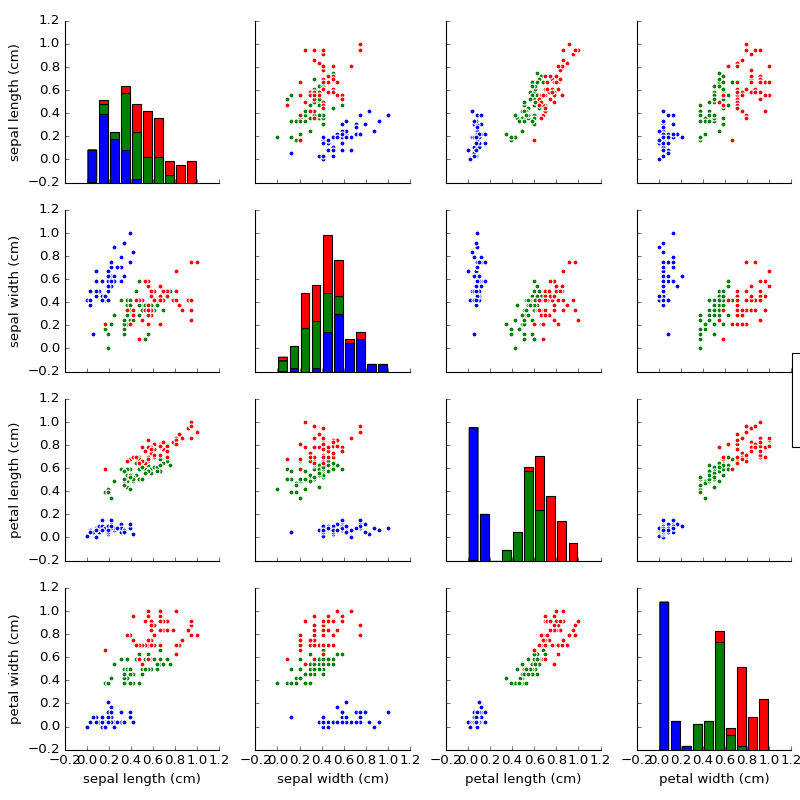

In [9]:
features_cols = iris.columns[:4]
sns.pairplot(data=iris,hue='target',vars=features_cols)

#### Split up the data into a training set and a test set:

In [15]:
#Splitting Data into Train and Test 
def split_data(data,train_size):
    N = len(data)   
    indx = list(range(N))
    np.random.shuffle(indx)
    train_indx = indx[0:int(N* train_size)]
    test_indx = indx[int(N* train_size):]
    train = data.iloc[train_indx]
    test = data.iloc[test_indx]
    return train, test

In [19]:
iris_train_man,iris_test_man  = split_data(iris,0.7)

In [20]:
iris_train_man.shape

(105, 5)

#### Alternative approach using train_test_split from sklearn

In [21]:
iris_train_sk, iris_test_sk = train_test_split(iris, test_size=0.3)
iris_train_sk.shape

(105, 5)

#### Implementing the kNN Algorithm:

In [22]:
def knn_algorithm(train, test, k):
    predictions = []   
    predictor_cols = [col for col in train.columns if col != 'target']  
    train_x = train[predictor_cols]
    train_y = train['target']
    test_x  = test[predictor_cols]
    test_y  = test['target']    
    for index, row in test_x.iterrows():
        vec_distances = pd.DataFrame((train_x.values - row.values)**2, index=train.index, columns = train_x.columns)
        distances = vec_distances.sum(axis = 1)
        nearest_k = distances.sort_values().iloc[:k]
        k_mean = train_y[nearest_k.index].mean()
        predictions.append(k_mean)
    predict = test.copy()  
    predict['target'] = pd.Series(predictions, index=test.index)
    return predict

In [23]:
k = 5
predicted_knn = knn_algorithm(iris_train_man, iris_test_man, k)
predicted_knn

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
113,0.388889,0.208333,0.677966,0.791667,1.8
126,0.527778,0.333333,0.644068,0.708333,1.8
42,0.027778,0.500000,0.050847,0.041667,0.0
110,0.611111,0.500000,0.694915,0.791667,2.0
92,0.416667,0.250000,0.508475,0.458333,1.0
76,0.694444,0.333333,0.644068,0.541667,1.0
57,0.166667,0.166667,0.389831,0.375000,1.0
109,0.805556,0.666667,0.864407,1.000000,2.0
63,0.500000,0.375000,0.627119,0.541667,1.2
19,0.222222,0.750000,0.084746,0.083333,0.0


#### Evaluation

In [24]:
def evaluate(predicted, true):
    squared_error = (predicted['target'] - true['target'])**2  
    error_var = squared_error.sum()
    sample_var = ((true['target'] - true['target'].mean())**2).sum()
    r = (1 - (error_var / sample_var))
    return r

In [25]:
evaluate(predicted_knn, iris_test_man)

0.9485714285714285

#### Now using sklearn to implement kNN:

In [26]:
train, test =  train_test_split(iris, test_size=.3)
x_train, x_test = train[features_cols], test[features_cols]
y_train, y_test = train['target'], test['target']

In [27]:
k = 10
neighbors = KNeighborsClassifier(n_neighbors=k)
neighbors.fit(x_train, y_train)
prediction_knn = neighbors.predict(x_test)
r = neighbors.score(x_test, y_test)
r

0.9555555555555556

In [28]:
expected_knn = y_test
predicted_knn = neighbors.predict(x_test)
print(metrics.classification_report(expected_knn, predicted_knn))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        12
        1.0       0.94      0.94      0.94        17
        2.0       0.94      0.94      0.94        16

avg / total       0.96      0.96      0.96        45



In [29]:
metrics.confusion_matrix(expected_knn, predicted_knn)

array([[12,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 15]], dtype=int64)

## Linear and Polynomial Regression

#### Linear Regression:
We will use the training/testing dataset as before and create our linear regression objects.

In [30]:
#sklearn
regr_sk = LinearRegression()
regr_sk.fit(x_train, y_train)
# This prints the regression coefficients of our model:
print(regr_sk.coef_)

[-0.50394217 -0.10257973  1.46011167  1.39703031]


In [31]:
import statsmodels.api as sm
# reate linear regression object from stats model:
model = sm.OLS(y_train.values, x_train)
regr_sm = model.fit()
# This prints the regression coefficients of our model:
regr_sm.params

sepal length (cm)   -0.446009
sepal width (cm)    -0.197320
petal length (cm)    1.308409
petal width (cm)     1.468126
dtype: float64

In [32]:
regr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     952.0
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           3.31e-79
Time:                        15:57:50   Log-Likelihood:                 17.960
No. Observations:                 105   AIC:                            -27.92
Df Residuals:                     101   BIC:                            -17.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
sepal length (cm)    -0.4460      0.220     -2.026      0.045        -0.883    -0.009
sepal width (cm)     -0.1973      0.081     -2.448      0.016        -0.357    -0.037
petal length (cm)     1.3084      0.327      4.005      0.000         0.660     1.956
petal width (cm)      1.4681      0.245      5.981      0.000         0.981     1.955
==============================================================================
Omnibus:                        1.616   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.153
Skew:                           0.236   Prob(JB):                        0.562
Kurtosis:                       3.202   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
regr_sm.predict(x_test)

array([-0.10399515,  1.97104758, -0.0138775 ,  1.76960375, -0.04372827,
        0.91502611, -0.10754247,  1.38074467,  1.17346891,  1.20464082,
        1.05266825, -0.00667408,  1.31876295,  1.68725123,  1.19626547,
        1.91760844,  0.08371046, -0.05389124,  1.82943208,  1.54054524,
        0.1939276 ,  1.97944537,  1.31642356,  1.73889831,  1.0182339 ,
        0.01404998,  1.96729625,  1.68308377,  1.7659432 ,  1.558645  ,
        1.63948226,  1.58574025,  1.84245937,  1.10301662,  1.28560933,
       -0.09160601,  1.76579399,  1.1782565 ,  1.69926025,  1.28915665,
        1.66871291,  1.22509798,  0.13600012, -0.05389124,  1.38930603])

In [35]:
np.round(regr_sm.predict(x_test))

array([ 0.,  2.,  0.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        2.,  1.,  2.,  0.,  0.,  2.,  2.,  0.,  2.,  1.,  2.,  1.,  0.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  2.,  1.,  2.,
        1.,  2.,  1.,  0.,  0.,  1.])

In [38]:
predicted_re = np.round(regr_sm.predict(x_test))
print metrics.classification_report(expected_knn, predicted_re)

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        12
        1.0       1.00      0.88      0.94        17
        2.0       0.89      1.00      0.94        16

avg / total       0.96      0.96      0.96        45



In [39]:
metrics.confusion_matrix(expected_knn, predicted_re)

array([[12,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 16]], dtype=int64)

#### Polynomial Regression

Polynomial regression is useful when you suspect a non-linear relationship between the predictor variables $x$ and the conditional expectation of $y$. Specifically, it is a special case of linear regression where the predictor variables are modeled through an $n$th degree polynomial. In Python, we can create the polynomial features through scikit-learn's PolynomialFeatures package. Then, we can use linear regression to implement a polynomial regression model.

In [42]:
# Create the PolynomialFeatures object and specify the number of degrees:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
x_train_poly.shape

(105L, 15L)

In [43]:
reg_poly = LinearRegression().fit(x_train_poly, y_train)
# Obtain coefficients
reg_poly.coef_

array([ 0.        , -1.432198  ,  0.48399348,  1.23769755,  1.78456338,
       -5.07785813,  5.6840409 ,  4.04127453,  2.19976466, -1.28273175,
       -2.53760214, -2.72180281,  2.06479677, -4.33550608,  1.83161984])

In [45]:
predicted_poly = reg_poly.predict(x_test_poly)
predicted_poly

array([  1.34091214e-02,   1.71721120e+00,  -3.05375918e-02,
         1.91961048e+00,   2.88518976e-03,   8.51649329e-01,
        -1.62992009e-01,   1.33440039e+00,   1.02750854e+00,
         1.26405845e+00,   1.04016189e+00,   8.34832800e-03,
         1.32787375e+00,   1.74460866e+00,   1.12565071e+00,
         2.12853673e+00,   1.64201041e-02,  -1.24013206e-03,
         1.90461417e+00,   1.53863188e+00,   1.32393077e-01,
         2.00155963e+00,   1.20956627e+00,   1.78504057e+00,
         1.06966197e+00,  -3.63143862e-02,   2.03303008e+00,
         1.78045842e+00,   1.99380801e+00,   1.68990916e+00,
         1.47882242e+00,   1.38557817e+00,   1.86778399e+00,
         1.06563446e+00,   1.18643295e+00,   1.15743580e-02,
         1.67222051e+00,   1.04148346e+00,   1.86123549e+00,
         1.14566175e+00,   1.61449969e+00,   1.20856105e+00,
        -8.03637775e-03,  -1.24013206e-03,   1.23371075e+00])

In [46]:
predicted_poly = np.round(predicted_poly)

In [47]:
print(metrics.classification_report(expected_knn, predicted_poly))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        12
        1.0       0.94      0.94      0.94        17
        2.0       0.94      0.94      0.94        16

avg / total       0.96      0.96      0.96        45



In [48]:
metrics.confusion_matrix(expected_knn, predicted_poly)

array([[12,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 15]], dtype=int64)